done


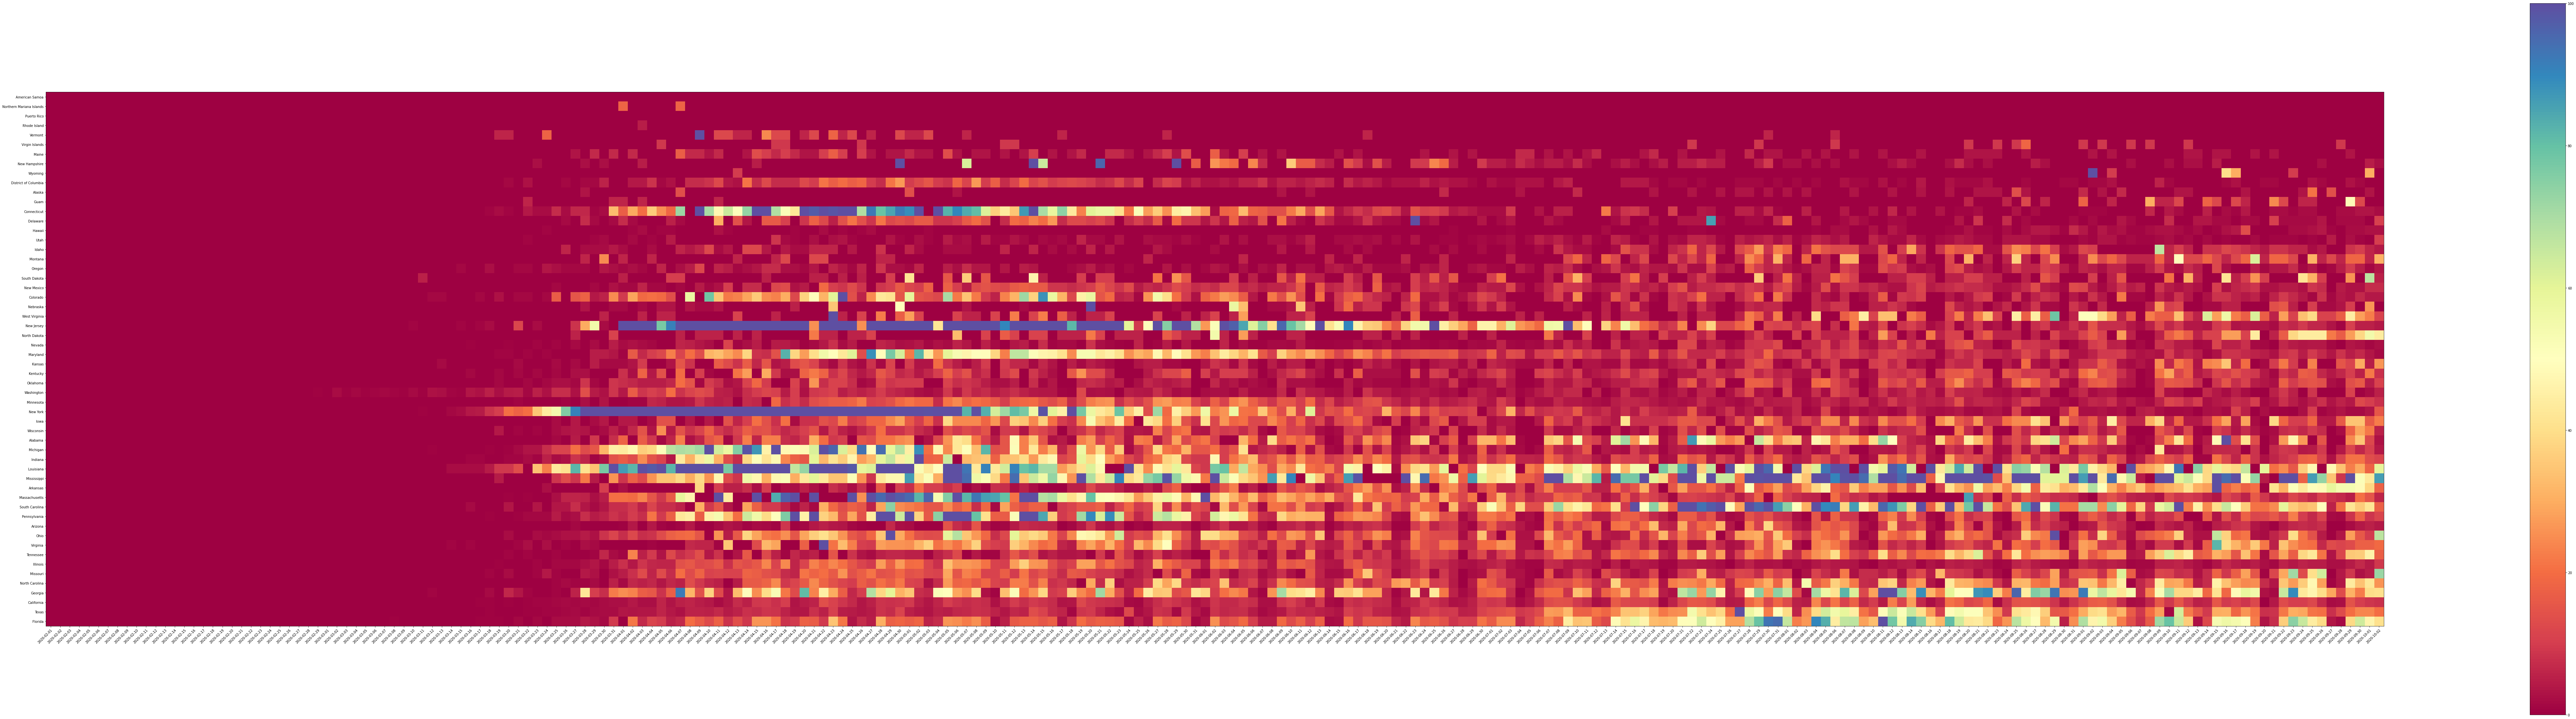

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

max_d_p1m = 100

# data has one row per day for all counties
data = pd.read_csv("us_deaths.csv", parse_dates=True, dayfirst=False) 
# remove lines with 0 population
data = data[data.Population>0]

us_states = data['Province/State'].unique()
population = {}
for state in us_states:
    maxval = data[data['Province/State']==state][['Population']].max()
    population[state] = int(maxval)
dates = data['Date'].unique()[10:]
dpd=[]

pos = 0
order = []
for state in us_states:
    s_data = data[data['Province/State']==state][['Date','Case']]
    s_data = s_data.groupby('Date').sum()
    # ordner by # last 2 weeks
    summe = s_data['Case'].diff(1)[-14:].sum()
#    print(state,summe)
    order.append((pos,summe))
    pos = pos + 1
    l = s_data['Case'].diff(1).tolist()[10:]
    # leave out negative value
    pop = population[state]
    l = [d if d>0 else 0 for d in l]
    l = [(1000000*d/pop) if (1000000*d/pop)<max_d_p1m else max_d_p1m for d in l]
#    l = [d if d<300 else 300 for d in l]
#    l = [math.sqrt(d) if (d>0 and d<300) else 0 for d in l]
    # fix freak data in New Jersey
#    l = [d if d<200 else np.nan for d in l]
    dpd.append(l)

# sort by count
order = sorted( order, key=lambda x: x[1])
order = [x for (x,_) in order]

us_states = [us_states[i] for i in order]
dpd = [dpd[i] for i in order]

dpd = np.array(dpd)

fig, ax = plt.subplots()
im = ax.imshow(dpd, cmap="Spectral")
fig.colorbar(im)

# We want to show all ticks...
ax.set_xticks(np.arange(len(dates)))
ax.set_yticks(np.arange(len(us_states)))
# ... and label them with the respective list entries
ax.set_xticklabels(dates)
ax.set_yticklabels(us_states)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(us_states)):
#    for j in range(len(dates)):
#        text = ax.text(j, i, dpd[i, j],
#                       ha="center", va="center", color="w")


fig = plt.gcf()
fig.set_size_inches(160, 40)
fig.savefig('d.jpeg', dpi=100)
print("done")